<a href="https://colab.research.google.com/github/JS-DS-coder/MITMachineLearning/blob/main/Lab1MIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
def get_sum_metrics(predictions, metrics=[]):
    for i in range(3):
        print('i',i)
        metrics.append(lambda x: x + i )

    sum_metrics = 0
    for metric in metrics:
      print('metric',metric(predictions))
      sum_metrics += metric(predictions)

    print('total',sum_metrics-3)
    return sum_metrics

In [3]:
metrics=[]
get_sum_metrics(0,metrics)

i 0
i 1
i 2
metric 2
metric 2
metric 2
total 3


6

In [4]:
import numpy as np

#yx / gamma 

y = 1
x = np.array([1,0])
gamma = 0.5

theta = (y*x)/ gamma

print (theta)


[2. 0.]


# HINGE LOSS SINGLE

In [5]:
import numpy as np

def red(s):
    return '\033[1;31m%s\033[m' % s

def log(*m):
    print(" ".join(map(str, m)))


def check_real(ex_name, f, exp_res, *args):
    try:
        res = f(*args)
    except NotImplementedError:
        log(red("FAIL"), ex_name, ": not implemented")
        return True
    if not np.isreal(res):
        log(red("FAIL"), ex_name, ": does not return a real number, type: ", type(res))
        return True
    if res != exp_res:
        log(red("FAIL"), ex_name, ": incorrect answer. Expected", exp_res, ", got: ", res)
        return True

def step_func(z):
        return 1.0 if (z > 0) else 0

def hinge_loss_single(feature_vector, label, theta, theta_0):
    """
    Finds the hinge loss on a single data point given specific classification
    parameters.

    Args:
        feature_vector - A numpy array describing the given data point.
        label - A real valued number, the correct classification of the data
            point.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.


    Returns: A real number representing the hinge loss associated with the
    given data point and parameters.
    """
    # Your code here
    yhat = (np.matmul(feature_vector,theta) + theta_0)
    print (yhat)
    print (label)
    hingeloss =  np.max([0.0, (1 - label*yhat)])
    print ('hingeloss',hingeloss)
    return hingeloss

    raise NotImplementedError


def green(s):
    return '\033[1;32m%s\033[m' % s

def check_hinge_loss_single():
    ex_name = "Hinge loss single"

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -0.2
    exp_res = 1 - 0.8
    if check_real(
            ex_name, hinge_loss_single,
            exp_res, feature_vector, label, theta, theta_0):
        return
    log(green("PASS"), ex_name, "")


check_hinge_loss_single()


0.8
1
hingeloss 0.19999999999999996
PASS Hinge loss single 


# HINGE LOSS FULL

In [6]:
def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    """
    Finds the total hinge loss on a set of data given specific classification
    parameters.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.

    y = np.matmul(theta/10, feature)
    hingeloss = np.max([0.0, (1 - label*y)])
    return hingeloss

    Returns: A real number representing the hinge loss associated with the
    given dataset and parameters. This number should be the average hinge
    loss across all of the points in the feature matrix.
    """
    # Your code here
    yhat = (np.sum(feature_matrix*theta,axis=1) + theta_0)

    #hingeloss =  np.mean(np.max([0.0, (1 - np.matmul(labels,yhat))]))
    hingeloss =  np.maximum(0,1-labels*yhat).mean()
    return hingeloss

    raise NotImplementedError

def check_hinge_loss_full():
    ex_name = "Hinge loss full"

    feature_vector = np.array([[1, 2], [1, 2]])
    label, theta, theta_0 = np.array([1, 1]), np.array([-1, 1]), -0.2
    exp_res = 1 - 0.8
    if check_real(
            ex_name, hinge_loss_full,
            exp_res, feature_vector, label, theta, theta_0):
        return

    log(green("PASS"), ex_name, "")

check_hinge_loss_full()

PASS Hinge loss full 


# Perceptron single step update

In [7]:
import numpy as np
def check_tuple(ex_name, f, exp_res, *args, **kwargs):
    try:
        res = f(*args, **kwargs)
    except NotImplementedError:
        log(red("FAIL"), ex_name, ": not implemented")
        return True
    if not type(res) == tuple:
        log(red("FAIL"), ex_name, ": does not return a tuple, type: ", type(res))
        return True
    if not len(res) == len(exp_res):
        log(red("FAIL"), ex_name, ": expected a tuple of size ", len(exp_res), " but got tuple of size", len(res))
        return True
    if not all(equals(x, y) for x, y in zip(res, exp_res)):
        log(red("FAIL"), ex_name, ": incorrect answer. Expected", exp_res, ", got: ", res)
        return True



def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the perceptron algorithm.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    # Your code here
    theta_return = current_theta.copy()
    theta_return_0 = current_theta_0
    yhat = (np.sum(feature_vector*current_theta) + current_theta_0)
    if label * (yhat) <= 0 :
      theta_return   = current_theta + (label * feature_vector)
      theta_return_0 = current_theta_0 + label
    #theta_return   = current_theta - ((label-yhat)*feature_vector)
    #theta_return_0 = current_theta_0 - ((yhat- label))

    #hingeloss =  np.mean(np.max([0.0, (1 - np.matmul(labels,yhat))]))
    hingeloss =  np.maximum(0,1-label*yhat).mean()
    return theta_return,theta_return_0
    raise NotImplementedError

def equals(x, y):
    if type(y) == np.ndarray:
        return (x == y).all()
    return x == y

def check_perceptron_single_update():
    ex_name = "Perceptron single update"

    feature_vector = np.array([1, 2])
    print(feature_vector)
    label, theta, theta_0 = 1, np.array([-1, 1]), -1.5
    exp_res = (np.array([0, 3]), -0.5)
    if check_tuple(
            ex_name, perceptron_single_step_update,
            exp_res, feature_vector, label, theta, theta_0):
        return

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -1
    exp_res = (np.array([0, 3]), 0)
    if check_tuple(
            ex_name + " (boundary case)", perceptron_single_step_update,
            exp_res, feature_vector, label, theta, theta_0):
        return

    log(green("PASS"), ex_name, "")




check_perceptron_single_update()

[1 2]
PASS Perceptron single update 


# PERCEPTRON

In [8]:
import random

def get_order(n_samples):
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices

def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])

    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    theta, the linear classification parameter, after T iterations through the
    feature matrix and the second element is a real number with the value of
    theta_0, the offset classification parameter, after T iterations through
    the feature matrix.
    """
    # Your code here
    theta_return = np.zeros((feature_matrix.shape[1],))
    theta_return_0 = 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            # Your code here
            #yhat = (np.sum(feature_matrix*theta_return) + theta_return_0)
            theta_return,theta_return_0=perceptron_single_step_update(feature_matrix[i,:],labels[i],theta_return,theta_return_0)
        
            pass
    return theta_return,theta_return_0        
    raise NotImplementedError


def check_perceptron():
    ex_name = "Perceptron"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, p1.perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 1
    exp_res = (np.array([0, 2]), 2)
    if check_tuple(
            ex_name, p1.perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 2
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, p1.perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 2
    exp_res = (np.array([0, 2]), 2)
    if check_tuple(
            ex_name, perceptron,
            exp_res, feature_matrix, labels, T):
        return

    log(green("PASS"), ex_name, "")

check_perceptron_single_update()

[1 2]
PASS Perceptron single update 


# AVERAGE PERCEPTRON

In [9]:

def average_perceptron(feature_matrix, labels, T):
    """
    Runs the average perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])


    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    the average theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the average theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.

    Hint: It is difficult to keep a running average; however, it is simple to
    find a sum and divide.
    """
    # Your code here
    theta_return = np.zeros((feature_matrix.shape[1],))
    theta_return_0 = 0
    theta = np.zeros((feature_matrix.shape[1],))
    theta_0 = 0
    cantidad = 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            # Your code here
            #yhat = (np.sum(feature_matrix*theta_return) + theta_return_0)
            theta,theta_0=perceptron_single_step_update(feature_matrix[i,:],labels[i],theta,theta_0)
            theta_return += theta
            theta_return_0 += theta_0
            cantidad += 1
            pass
    return theta_return/cantidad,theta_return_0/cantidad
    raise NotImplementedError


def check_average_perceptron():
    ex_name = "Average perceptron"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 1
    exp_res = (np.array([-0.5, 1]), 1.5)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 2
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    feature_matrix = np.array([[1, 2], [-1, 0]])
    labels = np.array([1, 1])
    T = 2
    exp_res = (np.array([-0.25, 1.5]), 1.75)
    if check_tuple(
            ex_name, average_perceptron,
            exp_res, feature_matrix, labels, T):
        return

    log(green("PASS"), ex_name, "")

check_average_perceptron()

PASS Average perceptron 


# PEGASOS SINGLE UPDATE

In [10]:
def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the Pegasos algorithm

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        L - The lamba value being used to update the parameters.
        eta - Learning rate to update parameters.
        current_theta - The current theta being used by the Pegasos
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the
            Pegasos algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    # Your code here
  
    yhat = (np.sum(feature_vector*current_theta) + current_theta_0)
    if label * (yhat) <= 1 :
      theta_return   = (1-L*eta) * current_theta + eta*label*feature_vector
      theta_return_0 = current_theta_0 + eta*label
    else:
      theta_return = (1-eta*L)*current_theta
      theta_return_0 =current_theta_0  
 
    return theta_return,theta_return_0

    raise NotImplementedError


def check_pegasos_single_update():
    ex_name = "Pegasos single update"

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -1.5
    L = 0.2
    eta = 0.1
    exp_res = (np.array([-0.88, 1.18]), -1.4)
    if check_tuple(
            ex_name, pegasos_single_step_update,
            exp_res,
            feature_vector, label, L, eta, theta, theta_0):
        return

    feature_vector = np.array([1, 1])
    label, theta, theta_0 = 1, np.array([-1, 1]), 1
    L = 0.2
    eta = 0.1
    exp_res = (np.array([-0.88, 1.08]), 1.1)
    if check_tuple(
            ex_name +  " (boundary case)", pegasos_single_step_update,
            exp_res,
            feature_vector, label, L, eta, theta, theta_0):
        return

    feature_vector = np.array([1, 2])
    label, theta, theta_0 = 1, np.array([-1, 1]), -2
    L = 0.2
    eta = 0.1
    exp_res = (np.array([-0.88, 1.18]), -1.9)
    if check_tuple(
            ex_name, pegasos_single_step_update,
            exp_res,
            feature_vector, label, L, eta, theta, theta_0):
        return

    log(green("PASS"), ex_name, "")

check_pegasos_single_update()

PASS Pegasos single update 


# PEGASOS

In [11]:

def pegasos(feature_matrix, labels, T, L):
    """
    Runs the Pegasos algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    For each update, set learning rate = 1/sqrt(t),
    where t is a counter for the number of updates performed so far (between 1
    and nT inclusive).

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the algorithm
            should iterate through the feature matrix.
        L - The lamba value being used to update the Pegasos
            algorithm parameters.

    Returns: A tuple where the first element is a numpy array with the value of
    the theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.
    """
    # Your code here
    theta_return = np.zeros((feature_matrix.shape[1],))
    theta_return_0 = 0
    t1 = 0
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            # Your code here
            # yhat = (np.sum(feature_matrix*theta_return) + theta_return_0)
            t1 = t1 + 1
            eta = 1/np.sqrt(t1)
            theta_return, theta_return_0 = pegasos_single_step_update(feature_matrix[i, :], labels[i],L,eta, theta_return,
                                                                      theta_return_0)

            pass
    return theta_return, theta_return_0
    raise NotImplementedError


def check_pegasos():
    ex_name = "Pegasos"

    feature_matrix = np.array([[1, 2]])
    labels = np.array([1])
    T = 1
    L = 0.2
    exp_res = (np.array([1, 2]), 1)
    if check_tuple(
            ex_name, pegasos,
            exp_res, feature_matrix, labels, T, L):
        return

    feature_matrix = np.array([[1, 1], [1, 1]])
    labels = np.array([1, 1])
    T = 1
    L = 1
    exp_res = (np.array([1-1/np.sqrt(2), 1-1/np.sqrt(2)]), 1)
    if check_tuple(
            ex_name, pegasos,
            exp_res, feature_matrix, labels, T, L):
        return

    log(green("PASS"), ex_name, "")




check_pegasos()


PASS Pegasos 


# Evaluate Algorithms

In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt


import sys

if sys.version_info[0] < 3:
    PYTHON3 = False
else:
    PYTHON3 = True


def load_toy_data(path_toy_data):
    """
    Loads the 2D toy dataset as numpy arrays.
    Returns the tuple (features, labels) in which features is an Nx2 numpy matrix and
    labels is a length-N vector of +1/-1 labels.
    """
    labels, xs, ys = np.loadtxt(path_toy_data, delimiter='\t', unpack=True)
    return np.vstack((xs, ys)).T, labels

def load_data(path_data, extras=False):
    """
    Returns a list of dict with keys:
    * sentiment: +1 or -1 if the review was positive or negative, respectively
    * text: the text of the review

    Additionally, if the `extras` argument is True, each dict will also include the
    following information:
    * productId: a string that uniquely identifies each product
    * userId: a string that uniquely identifies each user
    * summary: the title of the review
    * helpfulY: the number of users who thought this review was helpful
    * helpfulN: the number of users who thought this review was NOT helpful
    """

    global PYTHON3

    basic_fields = {'sentiment', 'text'}
    numeric_fields = {'sentiment', 'helpfulY', 'helpfulN'}

    data = []
    if PYTHON3:
        f_data = open(path_data, encoding="latin1")
    else:
        f_data = open(path_data)

    for datum in csv.DictReader(f_data, delimiter='\t'):
        for field in list(datum.keys()):
            if not extras and field not in basic_fields:
                del datum[field]
            elif field in numeric_fields and datum[field]:
                datum[field] = int(datum[field])

        data.append(datum)

    f_data.close()

    return data

def write_predictions(path_submit_data, preds):
    if PYTHON3:
        f_data = open(path_submit_data, encoding="latin1")
    else:
        f_data = open(path_submit_data)

    reader = csv.DictReader(f_data, delimiter='\t')
    data = list(reader)

    assert len(preds) == len(data), \
           'Expected {} predictions but {} were given.'.format(len(data), len(preds))

    for pred, datum in zip(preds.astype(int), data):
        assert pred == 1 or pred == -1, 'Invalid prediction: {}.'.format(pred)
        datum['sentiment'] = pred
    f_data.close()

    if PYTHON3:
        f_out = open(path_submit_data, 'w')
    else:
        f_out = open(path_submit_data, 'wb')

    writer = csv.DictWriter(f_out, delimiter='\t', fieldnames=reader.fieldnames)
    writer.writeheader()
    for datum in data:
        writer.writerow(datum)
    f_out.close()

def plot_toy_data(algo_name, features, labels, thetas):
    """
    Plots the toy data in 2D.
    Arguments:
    * features - an Nx2 ndarray of features (points)
    * labels - a length-N vector of +1/-1 labels
    * thetas - the tuple (theta, theta_0) that is the output of the learning algorithm
    * algorithm - the string name of the learning algorithm used
    """
    # plot the points with labels represented as colors
    plt.subplots()
    colors = ['b' if label == 1 else 'r' for label in labels]
    plt.scatter(features[:, 0], features[:, 1], s=40, c=colors)
    xmin, xmax = plt.axis()[:2]

    # plot the decision boundary
    theta, theta_0 = thetas
    xs = np.linspace(xmin, xmax)
    ys = -(theta[0]*xs + theta_0) / (theta[1] + 1e-16)
    plt.plot(xs, ys, 'k-')

    # show the plot
    algo_name = ' '.join((word.capitalize() for word in algo_name.split(' ')))
    plt.suptitle('Classified Toy Data ({})'.format(algo_name))
    plt.show()

def plot_tune_results(algo_name, param_name, param_vals, acc_train, acc_val):
    """
    Plots classification accuracy on the training and validation data versus
    several values of a hyperparameter used during training.
    """
    # put the data on the plot
    plt.subplots()
    plt.plot(param_vals, acc_train, '-o')
    plt.plot(param_vals, acc_val, '-o')

    # make the plot presentable
    algo_name = ' '.join((word.capitalize() for word in algo_name.split(' ')))
    param_name = param_name.capitalize()
    plt.suptitle('Classification Accuracy vs {} ({})'.format(param_name, algo_name))
    plt.legend(['train','val'], loc='upper right', title='Partition')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy (%)')
    plt.show()

def tune(train_fn, param_vals, train_feats, train_labels, val_feats, val_labels):
    train_accs = np.ndarray(len(param_vals))
    val_accs = np.ndarray(len(param_vals))

    for i, val in enumerate(param_vals):
        theta, theta_0 = train_fn(train_feats, train_labels, val)

        train_preds = classify(train_feats, theta, theta_0)
        train_accs[i] = accuracy(train_preds, train_labels)

        val_preds = classify(val_feats, theta, theta_0)
        val_accs[i] = accuracy(val_preds, val_labels)

    return train_accs, val_accs

def tune_perceptron(*args):
    return tune(perceptron, *args)

def tune_avg_perceptron(*args):
    return tune(average_perceptron, *args)

def tune_pegasos_T(best_L, *args):
    def train_fn(features, labels, T):
        return pegasos(features, labels, T, best_L)
    return tune(train_fn, *args)

def tune_pegasos_L(best_T, *args):
    def train_fn(features, labels, L):
        return pegasos(features, labels, best_T, L)
    return tune(train_fn, *args)

def most_explanatory_word(theta, wordlist):
    """Returns the word associated with the bag-of-words feature having largest weight."""
    return [word for (theta_i, word) in sorted(zip(theta, wordlist))[::-1]]


theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is -8.0


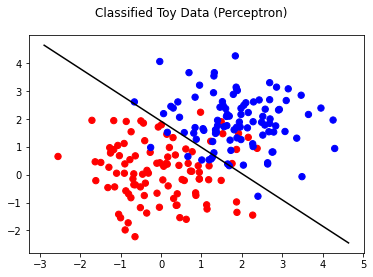

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is -6.373


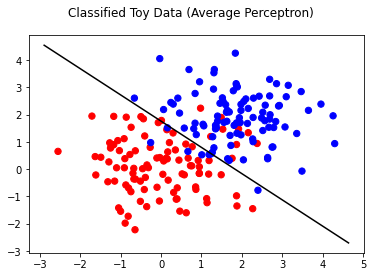

theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is -1.2195071848898564


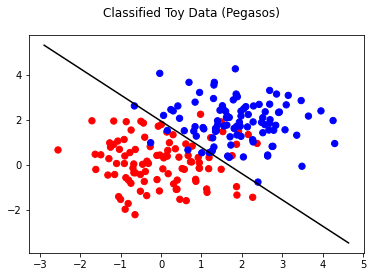

In [16]:
toy_features, toy_labels = toy_data = load_toy_data('toy_data.tsv')
#
T = 10
L = 0.2
#
thetas_perceptron = perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = pegasos(toy_features, toy_labels, T, L)
#
def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    plot_toy_data(algo_name, toy_features, toy_labels, thetas)
#
plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

In [17]:
#pragma: coderesponse template
def classify(feature_matrix, theta, theta_0):
    """
    A classification function that uses theta and theta_0 to classify a set of
    data points.
    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
                theta - A numpy array describing the linear classifier.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.
    Returns: A numpy array of 1s and -1s where the kth element of the array is
    the predicted classification of the kth row of the feature matrix using the
    given theta and theta_0. If a prediction is GREATER THAN zero, it should
    be considered a positive classification.
    """
    return ((np.sum(feature_matrix*theta, axis=1) + theta_0) > 0)*2 - 1

#pragma: coderesponse end
def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the percentage and number of correct predictions.
    """
    return (preds == targets).mean()

#pragma: coderesponse template
def classifier_accuracy(
        classifier,
        train_feature_matrix,
        val_feature_matrix,
        train_labels,
        val_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.
    The classifier is trained on the train data. The classifier's
    accuracy on the train and validation data is then returned.
    Args:
        classifier - A classifier function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        train_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        val_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        train_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        val_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        **kwargs - Additional named arguments to pass to the classifier
            (e.g. T or L)
    Returns: A tuple in which the first element is the (scalar) accuracy of the
    trained classifier on the training data and the second element is the
    accuracy of the trained classifier on the validation data.
    """
    theta, theta_0 = classifier(train_feature_matrix, train_labels, **kwargs)
    train_predict_labels = classify(train_feature_matrix, theta, theta_0)
    val_predict_labels = classify(val_feature_matrix, theta, theta_0)
    train_accuracy = accuracy(train_predict_labels, train_labels)
    val_accuracy = accuracy(val_predict_labels, val_labels)
    return (train_accuracy, val_accuracy)

In [76]:
from string import punctuation, digits
def bag_of_words(texts):
    """
    Inputs a list of string reviews
    Returns a dictionary of unique unigrams occurring over the input

    Feel free to change this code as guided by Problem 9
    """
    # Your code here
    stopwords = {}
    a_file = open("stopwords.txt")
    key = 0
    for line in a_file:
        value = line.strip()
        key += 1
        stopwords[value] = key

    print(len(stopwords))
    dictionary = {} # maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
          if word  not in stopwords:
            if word not in dictionary:
                dictionary[word] = len(dictionary)
    print(len(dictionary))
    return dictionary

def extract_words(input_string):
    """
    Helper function for bag_of_words()
    Inputs a text string
    Returns a list of lowercase words in the string.
    Punctuation and digits are separated out into their own words.
    """
    for c in punctuation + digits:
        input_string = input_string.replace(c, ' ' + c + ' ')

    return input_string.lower().split()

def extract_bow_feature_vectors(reviews, dictionary):
    """
    Inputs a list of string reviews
    Inputs the dictionary of words as given by bag_of_words
    Returns the bag-of-words feature matrix representation of the data.
    The returned matrix is of shape (n, m), where n is the number of reviews
    and m the total number of entries in the dictionary.

    Feel free to change this code as guided by Problem 9
    """
    # Your code here

    num_reviews = len(reviews)
    feature_matrix = np.zeros([num_reviews, len(dictionary)])

    for i, text in enumerate(reviews):
        word_list = extract_words(text)
        for word in word_list:
            if word in dictionary:
                feature_matrix[i, dictionary[word]] += 1
    return feature_matrix



T = 25
L = 0.01




train_data = load_data('reviews_train.tsv')
stopwords = load_data('stopwords.txt')
val_data = load_data('reviews_val.tsv')
test_data = load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))
stopwords = zip(*((sample['text'], sample['sentiment']) for sample in train_data))

dictionary = bag_of_words(train_texts)

train_bow_features = extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = extract_bow_feature_vectors(test_texts, dictionary)
#
pct_train_accuracy, pct_val_accuracy = \
classifier_accuracy(perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))
#
avg_pct_train_accuracy, avg_pct_val_accuracy = \
classifier_accuracy(average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))
#
avg_peg_train_accuracy, avg_peg_val_accuracy = \
classifier_accuracy(pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))
avg_peg_train_accuracy, avg_peg_val_accuracy = \
classifier_accuracy(pegasos, train_bow_features,test_bow_features,train_labels,test_labels,T=T,L=L)

print("{:50} {:.4f}".format("Test accuracy for Pegasos:", avg_peg_val_accuracy))

127
13108
Training accuracy for perceptron:   0.9015
Validation accuracy for perceptron: 0.7280
Training accuracy for average perceptron:   0.9565
Validation accuracy for average perceptron: 0.7440
Training accuracy for Pegasos:                     0.8928
Validation accuracy for Pegasos:                   0.7680
Test accuracy for Pegasos:                         0.7700


In [38]:
thetas_pegasos = pegasos(train_bow_features, train_labels, T, L)

In [45]:
def most_explanatory_word(theta, wordlist):
    """Returns the word associated with the bag-of-words feature having largest weight."""
    return [word for (theta_i, word) in sorted(zip(theta, wordlist))[::-1]]


best_theta,theta0 = pegasos(train_bow_features, train_labels, T, L) # Your code here
print(best_theta)
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = most_explanatory_word(best_theta, wordlist)

print(sorted_word_features)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

[-0.02449628 -0.01006264  0.01906329 ...  0.01342482  0.01342482
  0.01342482]
['delicious', 'great', '!', 'best', 'perfect', 'loves', 'wonderful', 'glad', 'love', 'quickly', 'excellent', 'favorite', 'without', 'tasty', 'find', 'pleased', 'day', 'always', 'smooth', 'nice', 'fantastic', 'thank', 'snack', 'hands', 'highly', 'worth', 'hooked', 'energy', 'stores', 've', 'coffee', 'spicy', 'my', 'originally', 'cook', 'goes', 'exactly', 'issues', 'good', 'definitely', 'adds', 'recommend', 'friends', 'haven', 'last', 'cat', 'healthy', 'weight', 'first', 'satisfied', 'sweetness', 'perfectly', 'easier', 'helps', 'fast', 'keep', 'free', 'needed', 'creamy', 'protein', 'whole', 'hit', 'appreciate', 'than', 'thanks', 'filling', 'wait', 'seller', 'ordering', 'years', 'kick', 'loved', 'long', 'treat', 'once', 'with', 'easy', ')', 'melt', 'amazon', 'shipped', 'keeps', 'rich', 'refreshing', 'yet', 'clean', 'trouble', 'fresh', 'cooking', 'range', 'bowl', 'mom', 'rarely', 'minutes', 'orange', 'anywhere',

In [73]:
a_dictionary = {}
a_file = open("stopwords.txt")
key = 0

for line in a_file:
    value = line.strip()
   
    key += 1
    a_dictionary[value] = key


remove = {"he":1, "is":2, "on":3, "the":4, "there":5, "to":6}
print(remove)
print(a_dictionary)


{'he': 1, 'is': 2, 'on': 3, 'the': 4, 'there': 5, 'to': 6}
{'i': 1, 'me': 2, 'my': 3, 'myself': 4, 'we': 5, 'our': 6, 'ours': 7, 'ourselves': 8, 'you': 9, 'your': 10, 'yours': 11, 'yourself': 12, 'yourselves': 13, 'he': 14, 'him': 15, 'his': 16, 'himself': 17, 'she': 18, 'her': 19, 'hers': 20, 'herself': 21, 'it': 22, 'its': 23, 'itself': 24, 'they': 25, 'them': 26, 'their': 27, 'theirs': 28, 'themselves': 29, 'what': 30, 'which': 31, 'who': 32, 'whom': 33, 'this': 34, 'that': 35, 'these': 36, 'those': 37, 'am': 38, 'is': 39, 'are': 40, 'was': 41, 'were': 42, 'be': 43, 'been': 44, 'being': 45, 'have': 46, 'has': 47, 'had': 48, 'having': 49, 'do': 50, 'does': 51, 'did': 52, 'doing': 53, 'a': 54, 'an': 55, 'the': 56, 'and': 57, 'but': 58, 'if': 59, 'or': 60, 'because': 61, 'as': 62, 'until': 63, 'while': 64, 'of': 65, 'at': 66, 'by': 67, 'for': 68, 'with': 69, 'about': 70, 'against': 71, 'between': 72, 'into': 73, 'through': 74, 'during': 75, 'before': 76, 'after': 77, 'above': 78, 'belo